# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [105]:
import json
import requests
from api_keys import weather_api_key
from citipy import citipy
import numpy as np
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import scipy.stats as st
from scipy.stats import linregress


## Generate Cities List

In [31]:
# Generate random latitudes and longitudes
rand_lat = np.random.uniform(-90,90,2000)
rand_lng = np.random.uniform(-180,180,2000)

# Create coordinate dataframe
coord_df = pd.DataFrame({'Latitude':rand_lat, 'Longitude':rand_lng})
coord_df

,Latitude,Longitude
0,11.245124,-66.824179
1,24.855711,113.782959
2,-53.770344,-151.746288
3,10.296658,-40.450688
4,38.380708,-85.490211
...,...,...
1995,-44.354764,150.536688
1996,-87.390674,-173.284642
1997,68.430070,0.910070
1998,-82.559021,-101.115224


In [58]:
# Empty lists for cities and countries
cities = []
countries = []

# Locate city and country for respective latitudes and longitudes
for i in range(0,len(coord_df['Latitude'])):
    city = citipy.nearest_city(coord_df['Latitude'][i], coord_df['Longitude'][i])
    cities.append(city.city_name)
    countries.append(city.country_code)

#Add to coordinates dataframe    
coord_df['City'] = cities
coord_df['Country'] = countries

# Remove duplicate cities
city_df = tude_df.drop_duplicates('City', keep='first')
city_df = city_df.reset_index()
city_df
len(city_df)

747

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [59]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [61]:
max_temps = []
humidities = []
clouds = []
wind_speeds = []
dates = []
new_lat = []
new_lng = []
new_cities = []
new_countries = []

for i in range(0,len(city_df['City'])):
    response = requests.get(query_url + city_df['City'][i]).json()
    
    try: 
        max_temps.append(response['main']['temp_max'])
        humidities.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        wind_speeds.append(response['wind']['speed'])
        dates.append(response['dt'])
        new_lat.append(response['coord']['lat'])
        new_lng.append(response['coord']['lon'])
        new_cities.append(response['name'])
        new_countries.append(response['sys']['country'])
        print(f'Processing Record {i} | {city_df["City"][i]}')
        
    except KeyError:
        max_temps.append(np.nan)
        humidities.append(np.nan)
        clouds.append(np.nan)
        wind_speeds.append(np.nan)
        dates.append(np.nan)
        new_lat.append(np.nan)
        new_lng.append(np.nan)
        new_cities.append(np.nan)
        new_countries.append(np.nan)
        print(f"Skipping {city_df['City'][i]} could not be found")
        
print('-----------------------------')
print('Data Retrieval Complete      ')
print('-----------------------------')

Processing Record 0 | chemal
Processing Record 1 | chokurdakh
Processing Record 2 | porto novo
Processing Record 3 | ushuaia
Processing Record 4 | sheltozero
Processing Record 5 | albany
Processing Record 6 | hamilton
Skipping grand river south east could not be found
Processing Record 8 | perth
Processing Record 9 | quthing
Skipping karauzyak could not be found
Skipping belushya guba could not be found
Processing Record 12 | saint-philippe
Processing Record 13 | rikitea
Processing Record 14 | ahuimanu
Processing Record 15 | new norfolk
Processing Record 16 | bilma
Processing Record 17 | san vicente
Processing Record 18 | meulaboh
Processing Record 19 | cabo san lucas
Processing Record 20 | nikolskoye
Skipping mukhanovo could not be found
Processing Record 22 | saskylakh
Processing Record 23 | yamada
Processing Record 24 | fairfield
Processing Record 25 | langholm
Processing Record 26 | moerai
Processing Record 27 | adrar
Processing Record 28 | carnarvon
Processing Record 29 | bluff
Pr

Processing Record 245 | ankara
Processing Record 246 | mount gambier
Processing Record 247 | pangnirtung
Processing Record 248 | shingu
Processing Record 249 | waddan
Processing Record 250 | vestmannaeyjar
Processing Record 251 | waingapu
Processing Record 252 | karaidel
Processing Record 253 | laguna
Processing Record 254 | bairiki
Processing Record 255 | solwezi
Processing Record 256 | muros
Processing Record 257 | chuy
Processing Record 258 | mookane
Processing Record 259 | sao joao da barra
Skipping nizhneyansk could not be found
Processing Record 261 | ayr
Processing Record 262 | naze
Processing Record 263 | comodoro rivadavia
Processing Record 264 | clyde river
Processing Record 265 | astoria
Processing Record 266 | zaysan
Processing Record 267 | arraial do cabo
Skipping paradwip could not be found
Processing Record 269 | kruisfontein
Processing Record 270 | poum
Skipping barentsburg could not be found
Processing Record 272 | choix
Processing Record 273 | provideniya
Processing R

Processing Record 491 | ulladulla
Processing Record 492 | gerash
Processing Record 493 | lagoa
Processing Record 494 | bangolo
Processing Record 495 | espanola
Processing Record 496 | bolshaya sosnova
Processing Record 497 | vero beach
Processing Record 498 | benguela
Processing Record 499 | awbari
Processing Record 500 | nelson bay
Processing Record 501 | baijiantan
Processing Record 502 | ouadda
Processing Record 503 | sungurlu
Processing Record 504 | olafsvik
Skipping umzimvubu could not be found
Processing Record 506 | el reno
Processing Record 507 | lakatoro
Processing Record 508 | todos santos
Processing Record 509 | nizwa
Processing Record 510 | samdari
Processing Record 511 | totma
Processing Record 512 | canto do buriti
Processing Record 513 | gander
Processing Record 514 | rudbar
Processing Record 515 | krasnyy chikoy
Processing Record 516 | kijang
Processing Record 517 | kindu
Processing Record 518 | maragogi
Processing Record 519 | ishigaki
Processing Record 520 | indramayu

Processing Record 737 | tabas
Processing Record 738 | buala
Processing Record 739 | kargalinskaya
Processing Record 740 | cootamundra
Processing Record 741 | hobyo
Processing Record 742 | zhelyabovka
Processing Record 743 | carutapera
Processing Record 744 | kosh-agach
Processing Record 745 | akot
Processing Record 746 | guadalajara
-----------------------------
Data Retrieval Complete      
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
#response = requests.get(query_url + city_df['City'][0]).json()
#pprint(response)
#print(response['coord']['lat'])
#print(response['coord']['lon'])
#print(len(cities))
#print(cities[0])
#print(countries[0])
#print(len(new_lat))
#print(response['sys']['country'])

In [74]:
weather_df = pd.DataFrame({'City':new_cities, 'Lat':new_lat,
                           'Lng':new_lng, 'Max Temp':max_temps,
                           'Humidity':humidities, 'Cloudiness':clouds,
                           'Wind Speed':wind_speeds, 'Country':new_countries,
                           'Date':dates})
clean_weather_df = weather_df.dropna()
clean_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chemal,51.4111,86.0050,60.53,99.0,66.0,0.51,RU,1.627345e+09
1,Chokurdakh,70.6333,147.9167,43.27,70.0,97.0,12.46,RU,1.627345e+09
2,Porto-Novo,6.4965,2.6036,78.62,77.0,34.0,10.74,BJ,1.627345e+09
3,Ushuaia,-54.8000,-68.3000,33.46,93.0,90.0,6.91,AR,1.627345e+09
4,Sheltozero,61.3667,35.3667,60.55,89.0,71.0,0.92,RU,1.627345e+09
...,...,...,...,...,...,...,...,...,...
742,Zhelyabovka,45.3988,34.7578,74.86,66.0,46.0,5.59,UA,1.627345e+09
743,Carutapera,-1.1950,-46.0200,75.04,93.0,81.0,6.35,BR,1.627345e+09
744,Kosh-Agach,50.0000,88.6667,56.57,68.0,51.0,1.66,RU,1.627345e+09
745,Akot,21.0964,77.0586,75.67,83.0,100.0,11.81,IN,1.627345e+09


In [159]:
date = date.fromtimestamp(clean_weather_df['Date'].mean())
clean_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,688.000000,688.000000,688.000000,688.000000,688.000000,688.000000,6.880000e+02
mean,20.504627,18.507691,70.989462,70.452035,51.915698,7.773910,1.627345e+09
std,32.090048,89.991102,13.350810,19.839033,36.663129,5.799702,1.974219e+02
min,-54.800000,-179.166700,33.460000,15.000000,0.000000,0.000000,1.627344e+09
25%,-5.579325,-65.055950,62.222500,59.000000,15.000000,3.440000,1.627345e+09
50%,25.403250,25.673150,72.890000,75.500000,55.000000,6.460000,1.627345e+09
75%,46.446375,96.396375,80.805000,85.000000,88.250000,10.887500,1.627345e+09
max,78.218600,179.316700,105.780000,100.000000,100.000000,34.340000,1.627345e+09


In [160]:
# Export file as a CSV, without the Pandas index, but with the header
clean_weather_df.to_csv("../output_data/city_data.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [161]:
clean_weather_df[clean_weather_df.Humidity > 100]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [162]:
#  Get the indices of cities that have humidity over 100%.


In [163]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [164]:
clean_city_data = clean_weather_df
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chemal,51.4111,86.0050,60.53,99.0,66.0,0.51,RU,1.627345e+09
1,Chokurdakh,70.6333,147.9167,43.27,70.0,97.0,12.46,RU,1.627345e+09
2,Porto-Novo,6.4965,2.6036,78.62,77.0,34.0,10.74,BJ,1.627345e+09
3,Ushuaia,-54.8000,-68.3000,33.46,93.0,90.0,6.91,AR,1.627345e+09
4,Sheltozero,61.3667,35.3667,60.55,89.0,71.0,0.92,RU,1.627345e+09
...,...,...,...,...,...,...,...,...,...
742,Zhelyabovka,45.3988,34.7578,74.86,66.0,46.0,5.59,UA,1.627345e+09
743,Carutapera,-1.1950,-46.0200,75.04,93.0,81.0,6.35,BR,1.627345e+09
744,Kosh-Agach,50.0000,88.6667,56.57,68.0,51.0,1.66,RU,1.627345e+09
745,Akot,21.0964,77.0586,75.67,83.0,100.0,11.81,IN,1.627345e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

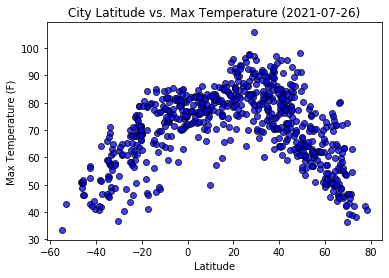

In [165]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Max Temp'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs. Max Temperature ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../output_data/lat_temp.png")
plt.show()

## Latitude vs. Humidity Plot

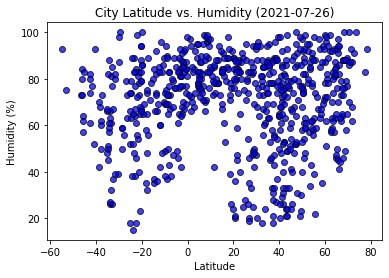

In [166]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Humidity'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs. Humidity ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/lat_hum.png")
plt.show()

## Latitude vs. Cloudiness Plot

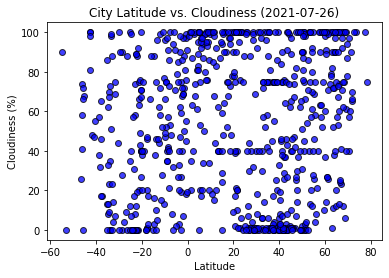

In [167]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Cloudiness'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs. Cloudiness ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../output_data/lat_cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

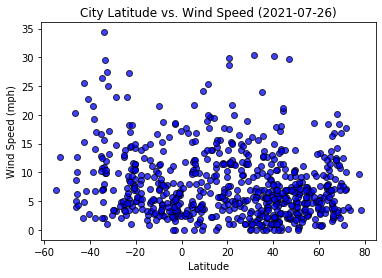

In [168]:
plt.scatter(clean_city_data['Lat'], clean_city_data['Wind Speed'], marker="o", facecolors="blue", edgecolors="black", alpha=0.75)
plt.title(f"City Latitude vs. Wind Speed ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/lat_wind.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.38833257999300436


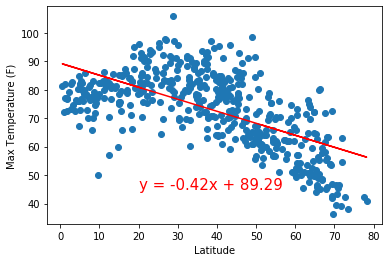

In [151]:
x_values = clean_city_data['Lat'][clean_city_data['Lat'] > 0]
y_values = clean_city_data['Max Temp'][clean_city_data['Lat'] > 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,45),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../output_data/lat_temp_north.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5566762476048769


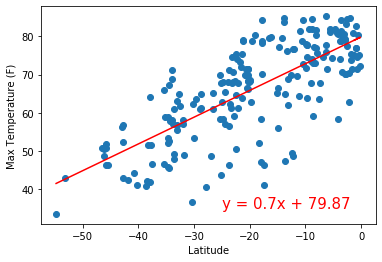

In [152]:
x_values = clean_city_data['Lat'][clean_city_data['Lat'] < 0]
y_values = clean_city_data['Max Temp'][clean_city_data['Lat'] < 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,35),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.savefig("../output_data/lat_temp_south.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.005570767361666064


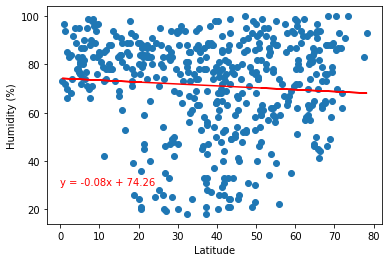

In [153]:
x_values = clean_city_data['Lat'][clean_city_data['Lat'] > 0]
y_values = clean_city_data['Humidity'][clean_city_data['Lat'] > 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/lat_hum_north.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.03174052019497999


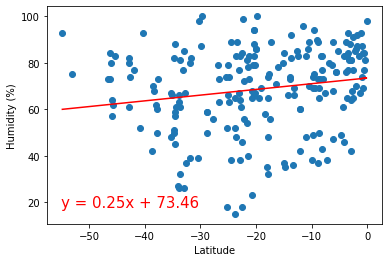

In [154]:
x_values = clean_city_data['Lat'][clean_city_data['Lat'] < 0]
y_values = clean_city_data['Humidity'][clean_city_data['Lat'] < 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,18),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/lat_hum_south.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0010160200879057743


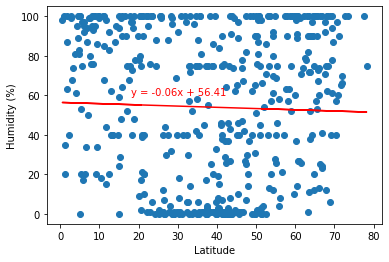

In [155]:
x_values = clean_city_data['Lat'][clean_city_data['Lat'] > 0]
y_values = clean_city_data['Cloudiness'][clean_city_data['Lat'] > 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,60),fontsize=10,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/lat_cloud_north.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.014107733903361291


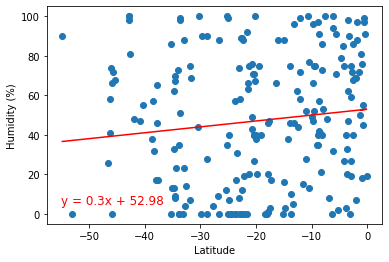

In [156]:
x_values = clean_city_data['Lat'][clean_city_data['Lat'] < 0]
y_values = clean_city_data['Cloudiness'][clean_city_data['Lat'] < 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,5),fontsize=12,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../output_data/lat_cloud_south.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01513693692074144


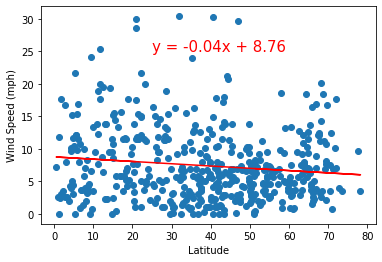

In [157]:
x_values = clean_city_data['Lat'][clean_city_data['Lat'] > 0]
y_values = clean_city_data['Wind Speed'][clean_city_data['Lat'] > 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,25),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/lat_wind_north.png")
print(f"The r-value is: {rvalue**2}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.09384931129564056


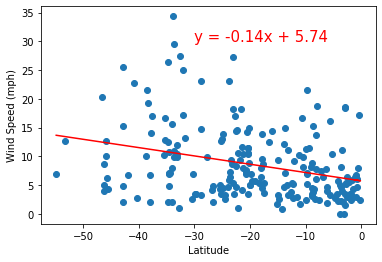

In [158]:
x_values = clean_city_data['Lat'][clean_city_data['Lat'] < 0]
y_values = clean_city_data['Wind Speed'][clean_city_data['Lat'] < 0]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../output_data/lat_wind_south.png")
print(f"The r-value is: {rvalue**2}")
plt.show()